# Network Analysis of Connecting Routes and Haulting Flights

### Problem Statement:

There are two datasets consisting of information for the connecting routes and flight halt. Create network analytics models on both the datasets separately and measure degree centrality, degree of closeness centrality, and degree of in-between centrality.

●	Create a network using edge list matrix (directed only).

-------------------------------------------------------------------------------------------------------------------------------

Importing our libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import networkx as nx

The data we are going to use Connecting_routes and Flights_Haulting does not have any columns header, we will add column header as per list provided in the word document

Flight_halt=c("ID","Name","City","Country","IATA_FAA","ICAO","Latitude","Longitude","Altitude","Time","DST","Tz database time")

connecting routes=c("flights", " ID", "main Airport”, “main Airport ID", "Destination ","Destination  ID","haults","machinary")



Loading our datasets

In [3]:
flights = pd.read_csv('flight_hault.csv')
flights.columns = ["ID","Name","City","Country","IATA_FAA","ICAO","Latitude","Longitude","Altitude","Time","DST","Tz database time"]
flights.head()

,ID,Name,City,Country,IATA_FAA,ICAO,Latitude,Longitude,Altitude,Time,DST,Tz database time
0,2,Madang,Madang,Papua New Guinea,MAG,AYMD,-5.207083,145.788700,20,10.0,U,Pacific/Port_Moresby
1,3,Mount Hagen,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789,144.295861,5388,10.0,U,Pacific/Port_Moresby
2,4,Nadzab,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569828,146.726242,239,10.0,U,Pacific/Port_Moresby
3,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,POM,AYPY,-9.443383,147.220050,146,10.0,U,Pacific/Port_Moresby
4,6,Wewak Intl,Wewak,Papua New Guinea,WWK,AYWK,-3.583828,143.669186,19,10.0,U,Pacific/Port_Moresby


There is an error in the connecting route file. We have 9 columns whereas, we have received only 8 column names. One column has only one value of Y for around 14.5K records. We will name this column as `NotProvided_Column`

In [4]:
routes = pd.read_csv('connecting_routes.csv')
routes.columns = ["flights", "ID", "main Airport", "main Airport ID", "Destination","Destination_ID","Not_Provided","haults","machinary"]
routes.head()

,flights,ID,main Airport,main Airport ID,Destination,Destination_ID,Not_Provided,haults,machinary
0,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
2,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
3,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
4,2B,410,DME,4029,KZN,2990,NaN,0,CR2


Lets Explore our dataset

In [5]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8106 entries, 0 to 8105
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8106 non-null   int64  
 1   Name              8106 non-null   object 
 2   City              8106 non-null   object 
 3   Country           8106 non-null   object 
 4   IATA_FAA          5879 non-null   object 
 5   ICAO              8042 non-null   object 
 6   Latitude          8106 non-null   float64
 7   Longitude         8106 non-null   float64
 8   Altitude          8106 non-null   int64  
 9   Time              8106 non-null   float64
 10  DST               8106 non-null   object 
 11  Tz database time  8106 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 760.1+ KB


In [6]:
import missingno as msno

<AxesSubplot:>

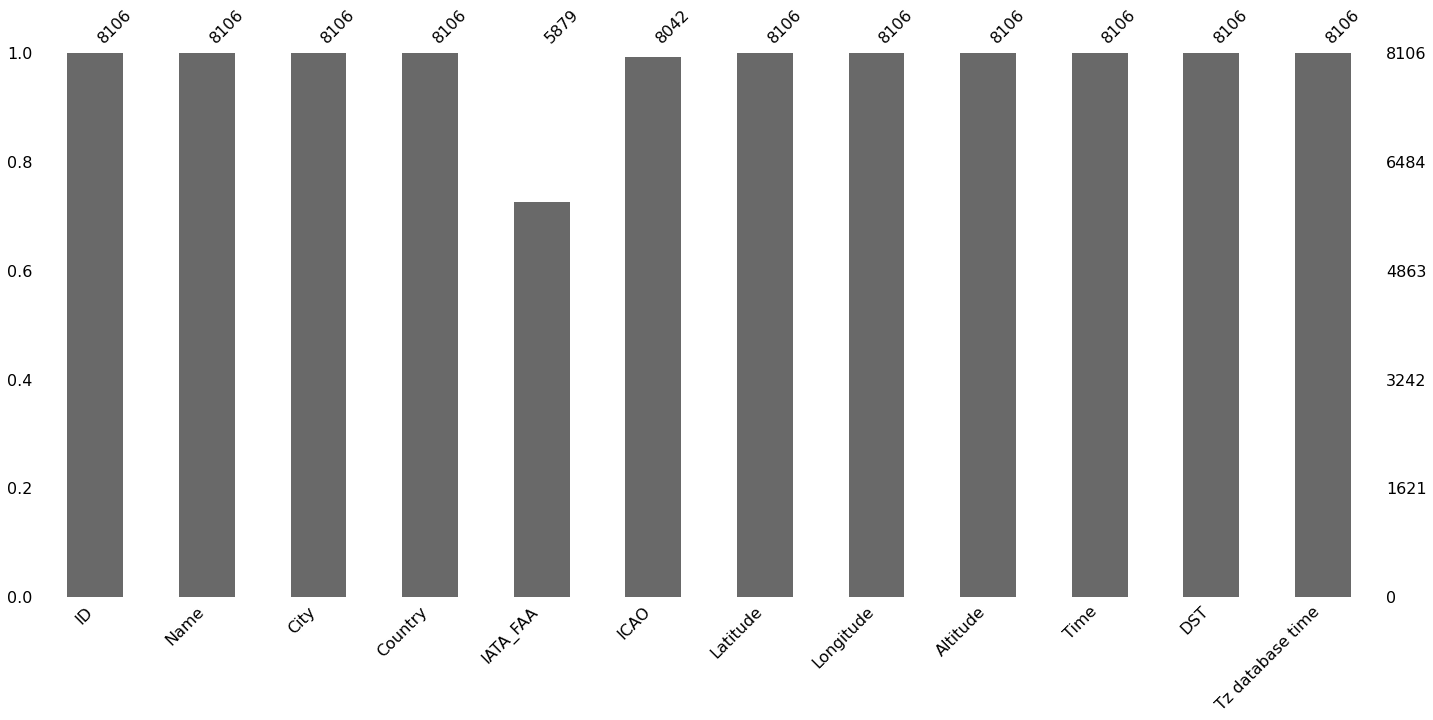

In [7]:
msno.bar(flights)

<AxesSubplot:>

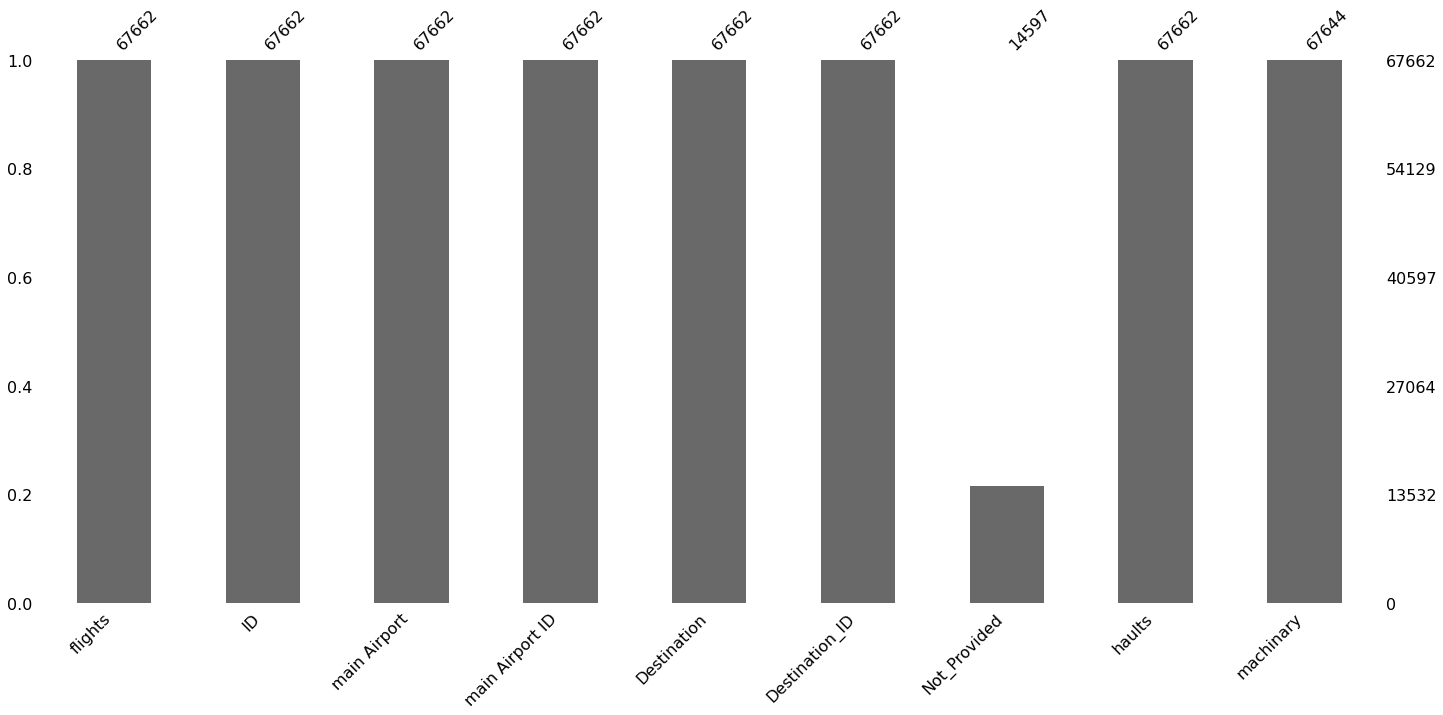

In [23]:
msno.bar(routes)

In [8]:
flights.nunique() # Shows Unique value in each column

ID                  8106
Name                7907
City                6976
Country              240
IATA_FAA            5877
ICAO                6781
Latitude            7985
Longitude           7986
Altitude            2415
Time                  38
DST                    7
Tz database time     294
dtype: int64

In [9]:
routes.nunique()

flights             568
ID                  548
main Airport       3409
main Airport ID    3321
Destination        3418
Destination_ID     3327
Not_Provided          1
haults                2
machinary          3945
dtype: int64

In [10]:
g = nx.from_pandas_edgelist(routes, source='main Airport', target = 'Destination')
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 3425
Number of edges: 19257
Average degree:  11.2450


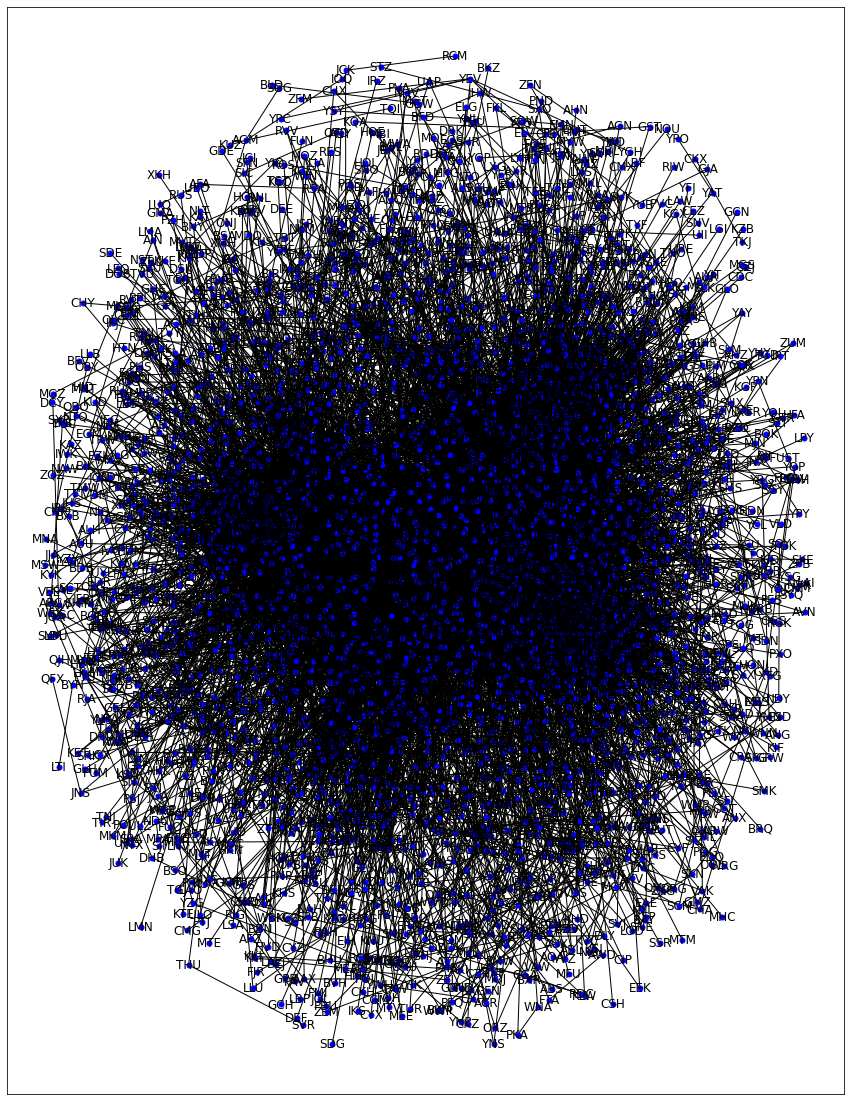

In [12]:
plt.rcParams['figure.figsize'] = (15,20)
pos = nx.spring_layout(g, k = 0.15)
nx.draw_networkx(g, pos, node_size = 25, node_color = 'blue')

In [30]:
# Closeness Centrality
closeness = nx.closeness_centrality(g)
print(closeness)


{'ASF': 0.2702365991625976, 'KZN': 0.2821671250701698, 'MRV': 0.2912936929830162, 'CEK': 0.27198231362747227, 'OVB': 0.314876037390167, 'DME': 0.3388219466816836, 'NBC': 0.27912728697792466, 'TGK': 0.25256665956528324, 'UUA': 0.25766745501550004, 'EGO': 0.25826015733496527, 'KGD': 0.27171902000343795, 'GYD': 0.3160282390657362, 'AER': 0.28031199833244147, 'LED': 0.3292501438868638, 'SVX': 0.3141418552473994, 'NJC': 0.26800039560491856, 'NUX': 0.26885608013750134, 'BTK': 0.2629169441856699, 'IKT': 0.2897152048823857, 'HTA': 0.2683420149747145, 'KCK': 0.22423466959341032, 'ODO': 0.22423466959341032, 'UKX': 0.22423466959341032, 'ULK': 0.22438404982763419, 'YKS': 0.2838793908101658, 'MJZ': 0.2552462088483341, 'AYP': 0.24616158532212357, 'LIM': 0.32739395139605526, 'CUZ': 0.2465038767537044, 'PEM': 0.24617957695970008, 'HUU': 0.24616158532212357, 'IQT': 0.2494060697491756, 'PCL': 0.24619757122744074, 'TPP': 0.24619757122744074, 'ABJ': 0.29416846916704076, 'BOY': 0.22715328918010633, 'OUA': 

In [14]:
b = nx.degree_centrality(g)  # Degree Centrality
print(b) 

{'ASF': 0.0020443925233644858, 'KZN': 0.006133177570093458, 'MRV': 0.004672897196261682, 'CEK': 0.0040887850467289715, 'OVB': 0.01547897196261682, 'DME': 0.055490654205607476, 'NBC': 0.0020443925233644858, 'TGK': 0.0002920560747663551, 'UUA': 0.0008761682242990653, 'EGO': 0.002628504672897196, 'KGD': 0.0029205607476635513, 'GYD': 0.01139018691588785, 'AER': 0.005257009345794392, 'LED': 0.03300233644859813, 'SVX': 0.019567757009345793, 'NJC': 0.002628504672897196, 'NUX': 0.0029205607476635513, 'BTK': 0.0011682242990654205, 'IKT': 0.008177570093457943, 'HTA': 0.002628504672897196, 'KCK': 0.0002920560747663551, 'ODO': 0.0002920560747663551, 'UKX': 0.0002920560747663551, 'ULK': 0.0005841121495327102, 'YKS': 0.006717289719626168, 'MJZ': 0.0017523364485981306, 'AYP': 0.0002920560747663551, 'LIM': 0.01664719626168224, 'CUZ': 0.0014602803738317756, 'PEM': 0.0005841121495327102, 'HUU': 0.0002920560747663551, 'IQT': 0.0011682242990654205, 'PCL': 0.0008761682242990653, 'TPP': 0.000876168224299065

In [15]:
## Betweeness Centrality 
b = nx.betweenness_centrality(g) # Betweeness_Centrality
print(b)

{'ASF': 7.792350098699574e-07, 'KZN': 4.855652034256442e-05, 'MRV': 2.9255326534146968e-05, 'CEK': 4.175908075972972e-06, 'OVB': 0.0015447465030426573, 'DME': 0.029360421912011502, 'NBC': 6.979147051473585e-07, 'TGK': 0.0, 'UUA': 7.394544691718019e-08, 'EGO': 4.0577592268671767e-07, 'KGD': 5.458081932220729e-06, 'GYD': 0.00030101815060444163, 'AER': 2.6919317731708027e-05, 'LED': 0.00796806516576167, 'SVX': 0.004151419248706718, 'NJC': 5.39111506977432e-06, 'NUX': 8.064876207670106e-06, 'BTK': 2.90770819149785e-07, 'IKT': 0.0028538077610340334, 'HTA': 2.1682506469788773e-05, 'KCK': 0.0, 'ODO': 0.0, 'UKX': 0.0, 'ULK': 0.0, 'YKS': 0.0032670919908927053, 'MJZ': 3.839475128392048e-07, 'AYP': 0.0, 'LIM': 0.012843276507220109, 'CUZ': 2.082255029948068e-06, 'PEM': 0.0, 'HUU': 0.0, 'IQT': 5.550682327265027e-06, 'PCL': 0.0, 'TPP': 0.0, 'ABJ': 0.0003591174849344738, 'BOY': 0.0, 'OUA': 0.0002924317603406076, 'ACC': 0.0029523873889597597, 'BKO': 6.421470558873646e-05, 'DKR': 0.001650211094468769, 

In [16]:
## Eigen-Vector Centrality
evg = nx.eigenvector_centrality(g) # Eigen vector centrality
print(evg)

{'ASF': 0.004687780297220764, 'KZN': 0.008848835694617902, 'MRV': 0.009820605305261815, 'CEK': 0.006710791087585149, 'OVB': 0.022818718556448188, 'DME': 0.07601137131350527, 'NBC': 0.006293487194115851, 'TGK': 0.0010881261201796393, 'UUA': 0.0020775297280268197, 'EGO': 0.0032727713371907005, 'KGD': 0.007799912752598012, 'GYD': 0.03206600106515401, 'AER': 0.009032525853139125, 'LED': 0.06563214052190079, 'SVX': 0.02792863264111086, 'NJC': 0.003483274887440672, 'NUX': 0.004410772890346838, 'BTK': 0.0021005093384218604, 'IKT': 0.0072790702489984, 'HTA': 0.003137060156127371, 'KCK': 0.00010420859652977954, 'ODO': 0.00010420859652977954, 'UKX': 0.00010420859652977954, 'ULK': 0.00019466135029742033, 'YKS': 0.006318295494595464, 'MJZ': 0.001790186902909919, 'AYP': 0.00032967088219562315, 'LIM': 0.023023558944051444, 'CUZ': 0.0003695901053655978, 'PEM': 0.00033496343418323176, 'HUU': 0.00032967088219562315, 'IQT': 0.0007907702178921818, 'PCL': 0.00034594904369196196, 'TPP': 0.00034594904369196

In [17]:
# cluster coefficient
cluster_coeff = nx.clustering(g)
print(cluster_coeff)

{'ASF': 0.5714285714285714, 'KZN': 0.42857142857142855, 'MRV': 0.5, 'CEK': 0.5494505494505495, 'OVB': 0.260522496371553, 'DME': 0.07435254803675856, 'NBC': 0.8095238095238095, 'TGK': 0, 'UUA': 0.6666666666666666, 'EGO': 0.5, 'KGD': 0.6222222222222222, 'GYD': 0.4318488529014845, 'AER': 0.5163398692810458, 'LED': 0.17714917825537294, 'SVX': 0.18995929443690637, 'NJC': 0.6111111111111112, 'NUX': 0.5777777777777777, 'BTK': 0.8333333333333334, 'IKT': 0.24338624338624337, 'HTA': 0.5277777777777778, 'KCK': 0, 'ODO': 0, 'UKX': 0, 'ULK': 1.0, 'YKS': 0.2490118577075099, 'MJZ': 0.8666666666666667, 'AYP': 0, 'LIM': 0.20614035087719298, 'CUZ': 0.6, 'PEM': 1.0, 'HUU': 0, 'IQT': 0.6666666666666666, 'PCL': 1.0, 'TPP': 1.0, 'ABJ': 0.5047619047619047, 'BOY': 1.0, 'OUA': 0.6190476190476191, 'ACC': 0.33793103448275863, 'BKO': 0.5666666666666667, 'DKR': 0.3548387096774194, 'COO': 0.5052631578947369, 'LFW': 0.525, 'NIM': 0.6666666666666666, 'BOG': 0.14365049981488337, 'GYE': 0.391812865497076, 'UIO': 0.2861

In [18]:
# Average clustering
cc = nx.average_clustering(g) 
print(cc)

0.4870933566129556
